## 2)Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

## ANSWER:

In [1]:
#Import necessary libraray
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Reading the Fraud Check Data
fraud = pd.read_csv("fraud.csv")

In [3]:
#Let's find top five rows
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
#Let's find the columns names
fraud.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [5]:
#Let's find the number of null values in each columns
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

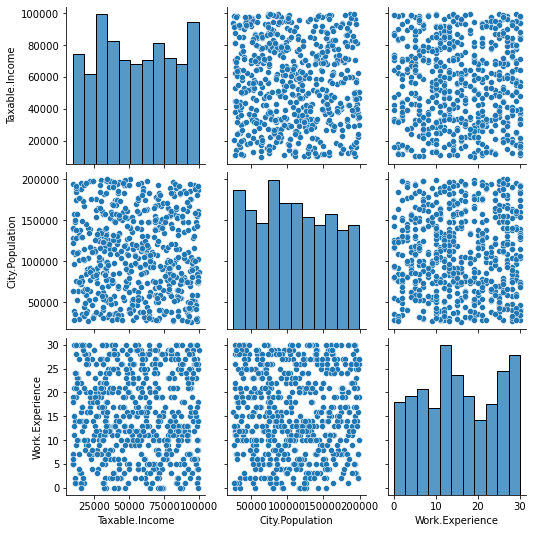

In [6]:
#Let's plot the graph
sns.pairplot(fraud)

In [7]:
#Let's apply given condition
fraud["TaxInc"] = pd.cut(fraud["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [8]:
#Let's Drop 
fraudCheck = fraud.drop(columns=["Taxable.Income"])

In [9]:
fCheck = pd.get_dummies(fraudCheck.drop(columns = ["TaxInc"]))

In [10]:
fCheck

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [11]:
fraud_final = pd.concat([fCheck, fraudCheck["TaxInc"]], axis = 1)

In [12]:
fraud_final

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,TaxInc
0,50047,10,1,0,0,0,1,0,1,Good
1,134075,18,0,1,1,0,0,0,1,Good
2,160205,30,1,0,0,1,0,0,1,Good
3,193264,15,0,1,0,0,1,0,1,Good
4,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1,Good
596,55369,2,0,1,1,0,0,0,1,Good
597,154058,0,1,0,1,0,0,0,1,Good
598,180083,17,0,1,0,1,0,1,0,Good


In [13]:
colnames = list(fraud_final.columns)
colnames

['City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES',
 'TaxInc']

In [14]:
predictors = colnames[:9]
predictors

['City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [15]:
target = colnames[9]
target

'TaxInc'

In [16]:
#Let's define x
X = fraud_final[predictors]

In [17]:
#Let's find shape
X.shape

(600, 9)

In [18]:
#Let's assign Y
Y = fraud_final[target]

In [19]:
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxInc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

# Decision Tree Model

In [21]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(fraud_final, test_size = 0.3)

In [22]:
fraud_final["TaxInc"].unique()

['Good', 'Risky']
Categories (2, object): ['Risky' < 'Good']

### Building Decision Tree Classifier using Entropy Criteria

In [23]:
from sklearn.tree import DecisionTreeClassifier
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choos

In [24]:
#Build a model
modelTree= DecisionTreeClassifier(criterion = "entropy",max_depth=4)
modelTree.fit(train[predictors], train[[target]])

DecisionTreeClassifier(criterion='entropy', max_depth=4)

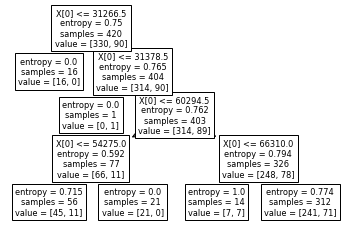

In [25]:
from sklearn import tree #To draw tree
tree.plot_tree(modelTree);

In [26]:
#Prediction
preds = modelTree.predict(test[predictors])
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [27]:
pd.Series(preds).value_counts()

Good    180
dtype: int64

In [28]:
166/(166+14)

0.9222222222222223

In [29]:
pd.crosstab(test[target],preds)

col_0,Good
TaxInc,
Risky,34
Good,146


In [30]:
temp = pd.Series(modelTree.predict(train[predictors])).reset_index(drop=True)
np.mean(pd.Series(train.TaxInc).reset_index(drop=True)==pd.Series(modelTree.predict(train[predictors])))
np.mean(preds==test.TaxInc)

0.8111111111111111

## Random Forest Model

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = 3, oob_score = True, n_estimators = 15, criterion = "entropy")
#rf = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")
# n_estimators -> Number of trees ( you can increase for better accuracy)
# n_jobs -> Parallelization of the computing and signifies the number of jobs 
# running parallel for both fit and predict
# oob_score = True means model has done out of box sampling to make predictions

In [32]:
np.shape(fraud_final) # 600,100 => Shape 

(600, 10)

In [33]:
fraud_final.describe()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,108747.368333,15.558333,0.480000,0.520000,0.315000,0.323333,0.361667,0.496667,0.503333
std,49850.075134,8.842147,0.500017,0.500017,0.464903,0.468139,0.480884,0.500406,0.500406
min,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,106493.500000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
fraud_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   City.Population          600 non-null    int64   
 1   Work.Experience          600 non-null    int64   
 2   Undergrad_NO             600 non-null    uint8   
 3   Undergrad_YES            600 non-null    uint8   
 4   Marital.Status_Divorced  600 non-null    uint8   
 5   Marital.Status_Married   600 non-null    uint8   
 6   Marital.Status_Single    600 non-null    uint8   
 7   Urban_NO                 600 non-null    uint8   
 8   Urban_YES                600 non-null    uint8   
 9   TaxInc                   600 non-null    category
dtypes: category(1), int64(2), uint8(7)
memory usage: 14.3 KB


In [35]:
Y1 = pd.DataFrame(Y)

In [36]:
#### Attributes that comes along with RandomForest function
rf.fit(X,Y1) # Fitting RandomForestClassifier model from sklearn.ensemble 
rf.estimators_ # 

<ipython-input-36-57d263770c1f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X,Y1) # Fitting RandomForestClassifier model from sklearn.ensemble


[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=317089792),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=93504309),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1211721921),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=367505323),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=349899590),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1390512171),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1706779850),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=255765987),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
            

In [37]:
rf.classes_ # class labels (output)
rf.n_classes_ # Number of levels in class labels 
rf.n_features_  # Number of input features in model 8 here.


9

In [38]:
rf.n_outputs_ # Number of outputs when fit performed

1

In [39]:
rf.oob_score_

0.72

In [40]:
rf.predict(X)

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',

In [41]:
fraud_final['rf_pred'] = rf.predict(X)

In [42]:
cols = ['rf_pred','TaxInc']

In [43]:
fraud_final[cols].head()

,rf_pred,TaxInc
0,Good,Good
1,Good,Good
2,Good,Good
3,Good,Good
4,Good,Good


In [44]:
fraud_final["TaxInc"]

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxInc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix(fraud_final['TaxInc'],fraud_final['rf_pred']) # Confusion matrix


array([[474,   2],
       [  6, 118]], dtype=int64)

In [46]:
pd.crosstab(fraud_final['TaxInc'],fraud_final['rf_pred'])


rf_pred,Good,Risky
TaxInc,,
Risky,6,118
Good,474,2


In [47]:
print("Accuracy",(476+117)/(476+117+7+0)*100)

Accuracy 98.83333333333333


In [48]:
fraud_final["rf_pred"]

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: rf_pred, Length: 600, dtype: object

### OR it may be solve by

##  Random Forest Classification

In [49]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = fraud_final[predictors]
Y = fraud_final[target]


num_trees = 500
max_features = 4     #due to sampling when we run it accu is change in all time

kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

C:\Users\91830\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.735
